# Job Shop Problem (JSP)

1. GA алгоритм
2. Точный алгоритм, размерность 2xN

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Genetic Algorithm

In [2]:
from ga import genetic_search
from estimator import estimate

In [3]:
n, m = 50, 15

# generate random JSP
random.seed(42)
sol = []

for j in range(n):
    for i in range(m):
        sol.append((j, i, random.randint(1, 7)))

# solution from GA
random.seed(42)
best_sol, best_times = genetic_search(sol, n, m, epoches=1000, levels=5, 
                            alive=16, count=3, early_stopping=50, verbose=50)
print('Best time:', estimate(best_sol, n, m))

Epoch: 50/1000; Best sol: 758
Epoch: 100/1000; Best sol: 641
Epoch: 150/1000; Best sol: 584
Epoch: 200/1000; Best sol: 549
Epoch: 250/1000; Best sol: 542
Epoch: 300/1000; Best sol: 528
Epoch: 350/1000; Best sol: 524
Epoch: 400/1000; Best sol: 519
Epoch: 450/1000; Best sol: 514
Epoch: 500/1000; Best sol: 512
Epoch: 550/1000; Best sol: 507
Epoch: 600/1000; Best sol: 505
Early stopping!
Best time: 505


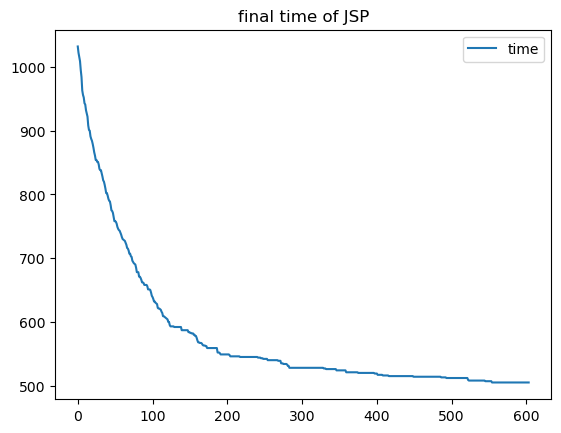

In [4]:
plt.plot(best_times, label='time')
plt.title('final time of JSP')
plt.legend()
None

## Точный алгоритм

Job Shop Scheduling Problem (JSP) - это NP-полная задача комбинаторной оптимизации, и точное решение для больших инстанций может потребовать значительных вычислительных ресурсов. Однако для относительно небольших инстанций, например, с двумя машинами и небольшим количеством работ (N), можно применить точные методы решения. Вот базовая идея:

1. **Определение переменных решения:** Каждая переменная решения `x[i, j, k]` равна 1, если задача `i` выполняется на машине `j` в момент времени `k`, и 0 в противном случае. Здесь `i` - номер задачи, `j` - номер машины, `k` - момент времени.

2. **Определение целевой функции:** Целью является минимизация суммарного времени завершения выполнения всех задач.

3. **Ограничения:**
   - Каждая задача должна быть выполнена ровно один раз:\
   $i = 1 \rightarrow \sum_{k=1}^{N} x[i, j, k] = 1$,\
   $i = 2 \rightarrow \sum_{k=1}^{N} x[i, j, k] = 1$.
   - Каждая машина должна выполнять только одну задачу в каждый момент времени:\
   $\sum_{i=1}^{N} x[i, j, k] = 1$.

4. **Решение задачи:** Применение линейного программирования (LP) или целочисленного программирования (IP) для решения задачи.

5. **Интерпретация результата:** После решения задачи, переменные `x[i, j, k]` будут содержать информацию о том, какие задачи выполняются на каких машинах в каждый момент времени.

In [5]:
from exact_alg import solve_jsp

In [6]:
n, m = 5, 2

# generate random Job Shop scheduling task
random.seed(42)
sol = []
processing_times = []

for j in range(n):
    l = []
    for i in range(m):
        t = random.randint(1, 7)
        sol.append((j, i, t))
        l.append(t)
    processing_times.append(l)

# solution from MILP
random.seed(42)
best_sol = solve_jsp(n, m, processing_times, verbose=False)
if not best_sol:
    print('No optimal solution')
print('Time:', estimate(best_sol, n, m))

Time: 19
